# Tối ưu hóa bằng cách sử dụng Gradient Descent trong hàm bậc 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Some functions defined specifically for this notebook.
from w2_tools import plot_f, gradient_descent_one_variable, f_example_2, dfdx_example_2
# Magic command to make matplotlib plots interactive.
%matplotlib widget

<a name='1'></a>
## 1 - Hàm với một tối thiểu toàn cục

Hàm $f\left(x\right)=e^x - \log(x)$ (được định nghĩa cho $x>0$) là hàm bậc 1 chỉ có một **điểm tối thiểu** (được gọi là **tối thiểu toàn cục**). Tuy nhiên, đôi khi điểm tối thiểu đó không thể được tìm thấy bằng phương pháp giải tích - giải phương trình $\frac{df}{dx}=0$. Nó có thể được thực hiện bằng cách sử dụng phương pháp Gradient Descent.

Để triển khai Gradient Descent, bạn cần bắt đầu từ một số điểm khởi tạo $x_0$. Nhằm tìm một điểm có đạo hàm bằng 0, bạn muốn di chuyển "xuống đồi". Tính đạo hàm $\frac{df}{dx}(x_0)$ (được gọi là **gradient**) và chuyển sang điểm tiếp theo bằng cách sử dụng biểu thức:

$$x_1 = x_0 - \alpha \frac{df}{dx}(x_0),\tag{1}$$

trong đó $\alpha>0$ là tham số được gọi là **learning rate**. Lặp lại quá trình lặp đi lặp lại. Số lần lặp $n$ cũng thường là một tham số.

Trừ $\frac{df}{dx}(x_0)$ bạn di chuyển "xuống đồi" theo chiều tăng của hàm - về phía điểm tối thiểu. Vì vậy, $\frac{df}{dx}(x_0)$ thường xác định hướng chuyển động. Tham số $\alpha$ đóng vai trò là hệ số tỷ lệ.

Bây giờ là lúc triển khai phương pháp Gradient Descent và thử nghiệm các tham số!

Đầu tiên, xác định hàm $f\left(x\right)=e^x - \log(x)$ và đạo hàm của nó $\frac{df}{dx}\left(x\right)=e^x - \frac {1}{x}$:

In [2]:
def f_example_1(x):
    return np.exp(x) - np.log(x)

def dfdx_example_1(x):
    return np.exp(x) - 1/x

Hàm $f\left(x\right)$ có một mức tối thiểu toàn cục. Hãy vẽ đồ thị hàm số:

(<Figure size 800x400 with 1 Axes>, <AxesSubplot: xlabel='$x$', ylabel='$f$'>)

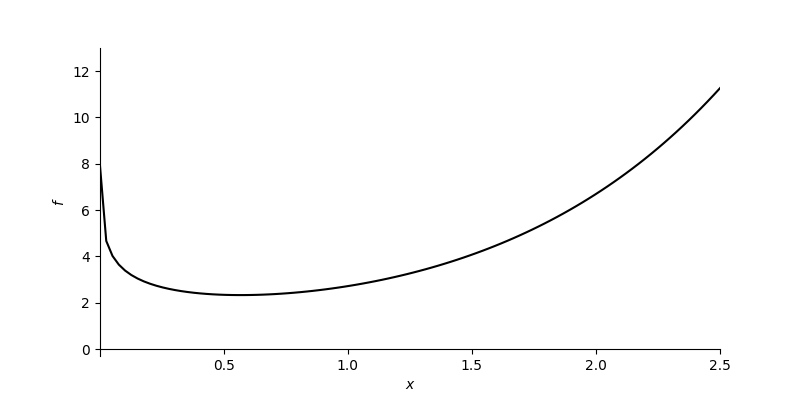

In [3]:
plot_f([0.001, 2.5], [-0.3, 13], f_example_1, 0.0)

Gradient descent có thể được triển khai trong hàm sau:

In [4]:
def gradient_descent(dfdx, x, learning_rate = 0.1, num_iterations = 100):
    for iteration in range(num_iterations):
        x = x - learning_rate * dfdx(x)
    return x

Lưu ý rằng có ba tham số trong quá trình triển khai này: `num_iterations`, `learning_rate`, điểm khởi tạo `x_initial`. Các tham số mô hình cho các phương pháp như Gradient Descent thường được tìm thấy bằng thực nghiệm. Hiện tại, chỉ cần giả sử rằng bạn biết các tham số sẽ hoạt động trong mô hình này - bạn sẽ thấy phần thảo luận về điều đó sau. Để tối ưu hóa hàm, hãy thiết lập các tham số và gọi hàm đã xác định `gradient_descent`:

In [5]:
num_iterations = 25; learning_rate = 0.1; x_initial = 1.6
print("Gradient descent result: x_min =", gradient_descent(dfdx_example_1, x_initial, learning_rate, num_iterations)) 

Gradient descent result: x_min = 0.5671434156768685


Đoạn mã ở ô sau sẽ giúp bạn hình dung và hiểu sâu hơn về phương pháp Gradient Descent. Sau khi kết thúc hoạt ảnh, bạn có thể nhấp vào biểu đồ để chọn điểm khởi tạo mới và xem xét cách thực hiện phương pháp Gradient Descent.

Bạn có thể thấy rằng nó hoạt động thành công ở đây, đưa nó đến điểm tối thiểu toàn cầu!

Điều gì sẽ xảy ra nếu một số tham số sẽ được thay đổi? Phương pháp này có luôn hiệu quả không? Bỏ ghi chú các dòng trong ô bên dưới và chạy lại mã để điều tra điều gì sẽ xảy ra nếu các giá trị tham số khác được chọn. Hãy thử tìm hiểu và phân tích kết quả. Bạn có thể đọc một số ý kiến ​​​​dưới đây.

*Ghi chú liên quan đến hoạt hình này*:
- Gradient descent được thực hiện với một số tạm dừng giữa các lần lặp nhằm mục đích trực quan hóa. Việc thực hiện thực tế nhanh hơn nhiều.
- Hoạt ảnh dừng khi đạt đến điểm tối thiểu với độ chính xác nhất định (có thể là số bước nhỏ hơn `num_iterations`) - để tránh code chạy mãi và cho mục đích giảng dạy.
- Vui lòng đợi kết thúc hoạt ảnh trước khi thực hiện bất kỳ thay đổi mã nào hoặc chạy lại ô. Trong trường hợp có bất kỳ sự cố nào, bạn có thể thử khởi động lại Kernel và chạy lại notebook.

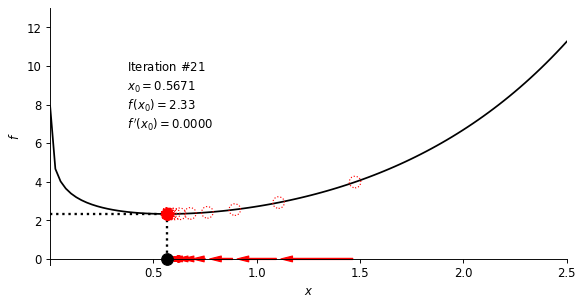

In [6]:
num_iterations = 25; learning_rate = 0.1; x_initial = 1.6
# num_iterations = 25; learning_rate = 0.3; x_initial = 1.6
# num_iterations = 25; learning_rate = 0.5; x_initial = 1.6
# num_iterations = 25; learning_rate = 0.04; x_initial = 1.6
# num_iterations = 75; learning_rate = 0.04; x_initial = 1.6
# num_iterations = 25; learning_rate = 0.1; x_initial = 0.05
# num_iterations = 25; learning_rate = 0.1; x_initial = 0.03
# num_iterations = 25; learning_rate = 0.1; x_initial = 0.02

gd_example_1 = gradient_descent_one_variable([0.001, 2.5], [-0.3, 13], f_example_1, dfdx_example_1, 
                                   gradient_descent, num_iterations, learning_rate, x_initial, 0.0, [0.35, 9.5])

<a name='2'></a>
## 2 - Hàm có nhiều cực tiểu

Bây giờ bạn có thể lấy một ví dụ phức tạp hơn một chút - hàm bậc 1 nhưng có nhiều cực tiểu.

(<Figure size 800x400 with 1 Axes>, <AxesSubplot: xlabel='$x$', ylabel='$f$'>)

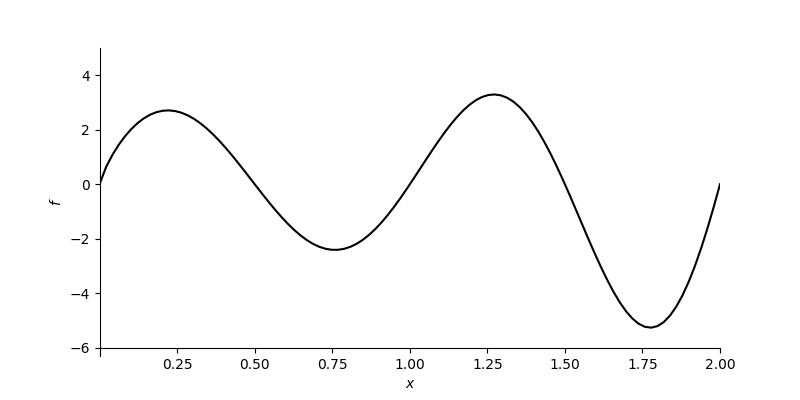

In [7]:
plot_f([0.001, 2], [-6.3, 5], f_example_2, -6)

Hàm `f_example_2` và hàm `dfdx_example_2` phái sinh của nó được xác định trước và tải lên sổ tay này. Ở giai đoạn này, trong khi bạn đang nắm vững phương pháp tối ưu hóa, đừng lo lắng về các biểu thức tương ứng, bây giờ chỉ cần tập trung vào việc Gradient Descent và các tham số liên quan.

Sử dụng mã sau đây để chạy Gradient descent với cùng `learning_rate` và `num_iterations` nhưng có điểm khởi tạo khác:

In [8]:
print("Gradient descent results")
print("Global minimum: x_min =", gradient_descent(dfdx_example_2, x=1.3, learning_rate=0.005, num_iterations=35)) 
print("Local minimum: x_min =", gradient_descent(dfdx_example_2, x=0.25, learning_rate=0.005, num_iterations=35)) 

Gradient descent results
Global minimum: x_min = 1.7751686214270586
Local minimum: x_min = 0.7585728671820583


Kết quả là khác nhau. Cả hai lần điểm đều rơi vào một trong các điểm cực tiểu, nhưng trong lần chạy đầu tiên, nó là tối thiểu toàn cục, trong khi ở lần chạy thứ hai, nó bị "kẹt" ở điểm cục bộ. Để xem trực quan những gì đang xảy ra, hãy chạy mã bên dưới. Bạn có thể bỏ ghi chú các dòng để thử các bộ tham số khác nhau hoặc nhấp vào biểu đồ để chọn điểm khởi tạo (sau khi kết thúc hoạt ảnh).

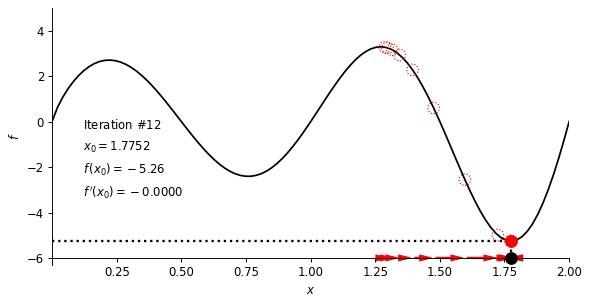

In [9]:
num_iterations = 35; learning_rate = 0.005; x_initial = 1.3
# num_iterations = 35; learning_rate = 0.005; x_initial = 0.25
# num_iterations = 35; learning_rate = 0.01; x_initial = 1.3

gd_example_2 = gradient_descent_one_variable([0.001, 2], [-6.3, 5], f_example_2, dfdx_example_2, 
                                      gradient_descent, num_iterations, learning_rate, x_initial, -6, [0.1, -0.5])

Bạn có thể thấy rằng phương pháp Gradient Descent rất mạnh mẽ - nó cho phép bạn tối ưu hóa một hàm với một số lượng phép tính nhỏ, nhưng nó có một số nhược điểm. Hiệu quả của phương pháp phụ thuộc rất nhiều vào việc lựa chọn các tham số ban đầu và việc chọn đúng bộ tham số để huấn luyện mô hình là một thách thức trong các ứng dụng học máy!